#README
**Impact of Canadian Wildfires on PM2.5 Levels and Precipitation Reduction in New York City (May-June 2023)**

In [153]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

#README Hypothesis: Increased PM2.5 levels due to Canadian wildfires in May and June 2023 are associated with reduced precipitation in New York City.

In [71]:
# Loading the CSV files 
data1 = 'hourlyMonitoring.csv'
site_location_file_path = "location.csv"

data1_df = pd.read_csv(data1)
location_df = pd.read_csv(site_location_file_path)

data2 = "june2023hourlyMonitoring.csv"
data2_df = pd.read_csv(data2)

In [77]:
# NYC Open Data 
# loading heads of files 
data1_df_head = data1_df.head()
data2_df_head = data2_df.head
location_df_head = location_df.head()

# site id, may 2023 PM2.5
location_df_head, data1_df_head

(         SiteID   Latitude  Longitude          SiteName  \
 0  36061NY08454  40.716510 -73.997004  Manhattan Bridge   
 1  36005NY11790  40.819092 -73.885659       Hunts Point   
 2  36081NY08198  40.707113 -73.873400          Glendale   
 3  36081NY09285  40.737107 -73.821556    Queens College   
 4  36061NY09734  40.750690 -73.987830  Broadway/35th St   
 
                                              Address  
 0                      Canal St SS1E of Elizabeth St  
 1  Southeast Corner of Seneca Ave and Longfellow Ave  
 2   Cooper Rapid Rehousing Center - 78-16 Cooper Ave  
 3                      Queens College Reference Site  
 4                           Broadway ES1N of 35th St  ,
        ID        SiteID       ObservationTimeUTC  Value
 0  402389  36081NY09285  2023-05-01 00:00:00.000   5.91
 1  404902  36061NY10130  2023-05-01 00:00:00.000  11.11
 2  407436  36061NY08552  2023-05-01 00:00:00.000  12.93
 3  410211  36005NY12387  2023-05-01 00:00:00.000  12.19
 4  412737  3606

In [80]:
# site id, june 2023 PM2.5
location_df_head, data2_df_head 

(         SiteID   Latitude  Longitude          SiteName  \
 0  36061NY08454  40.716510 -73.997004  Manhattan Bridge   
 1  36005NY11790  40.819092 -73.885659       Hunts Point   
 2  36081NY08198  40.707113 -73.873400          Glendale   
 3  36081NY09285  40.737107 -73.821556    Queens College   
 4  36061NY09734  40.750690 -73.987830  Broadway/35th St   
 
                                              Address  
 0                      Canal St SS1E of Elizabeth St  
 1  Southeast Corner of Seneca Ave and Longfellow Ave  
 2   Cooper Rapid Rehousing Center - 78-16 Cooper Ave  
 3                      Queens College Reference Site  
 4                           Broadway ES1N of 35th St  ,
 <bound method NDFrame.head of           ID        SiteID       ObservationTimeUTC  Value
 0     403110  36081NY09285  2023-06-01 00:00:00.000  19.70
 1     405678  36061NY10130  2023-06-01 00:00:00.000  19.00
 2     408168  36061NY08552  2023-06-01 00:00:00.000  20.65
 3     411039  36005NY12387  20

In [85]:
# merging the df to match site locations of hourly monitoring
data1merged_df = pd.merge(data1_df, location_df, on='SiteID', how='inner')
data1merged_df_head = data1merged_df.head()

data2merged_df = pd.merge(data2_df, location_df, on='SiteID', how='inner')
data2merged_df_head = data2merged_df.head()

In [90]:
data1merged_df_head

,ID,SiteID,ObservationTimeUTC,Value,Latitude,Longitude,SiteName,Address
0,402389,36081NY09285,2023-05-01 00:00:00.000,5.91,40.737107,-73.821556,Queens College,Queens College Reference Site
1,404902,36061NY10130,2023-05-01 00:00:00.000,11.11,40.761234,-73.963886,Queensboro Bridge,60 St NS1E of 2nd Ave
2,407436,36061NY08552,2023-05-01 00:00:00.000,12.93,40.718073,-73.986059,Williamsburg Bridge,Delancey St NS 1E of Suffolk St
3,410211,36005NY12387,2023-05-01 00:00:00.000,12.19,40.845167,-73.906143,Cross Bronx Expy,Cross Bronx Expressway Service road NS1E of Mo...
4,412737,36061NY08454,2023-05-01 00:00:00.000,13.34,40.716510,-73.997004,Manhattan Bridge,Canal St SS1E of Elizabeth St


In [94]:
data2merged_df_head

,ID,SiteID,ObservationTimeUTC,Value,Latitude,Longitude,SiteName,Address
0,403110,36081NY09285,2023-06-01 00:00:00.000,19.70,40.737107,-73.821556,Queens College,Queens College Reference Site
1,405678,36061NY10130,2023-06-01 00:00:00.000,19.00,40.761234,-73.963886,Queensboro Bridge,60 St NS1E of 2nd Ave
2,408168,36061NY08552,2023-06-01 00:00:00.000,20.65,40.718073,-73.986059,Williamsburg Bridge,Delancey St NS 1E of Suffolk St
3,411039,36005NY12387,2023-06-01 00:00:00.000,22.43,40.845167,-73.906143,Cross Bronx Expy,Cross Bronx Expressway Service road NS1E of Mo...
4,413474,36061NY08454,2023-06-01 00:00:00.000,23.41,40.716510,-73.997004,Manhattan Bridge,Canal St SS1E of Elizabeth St


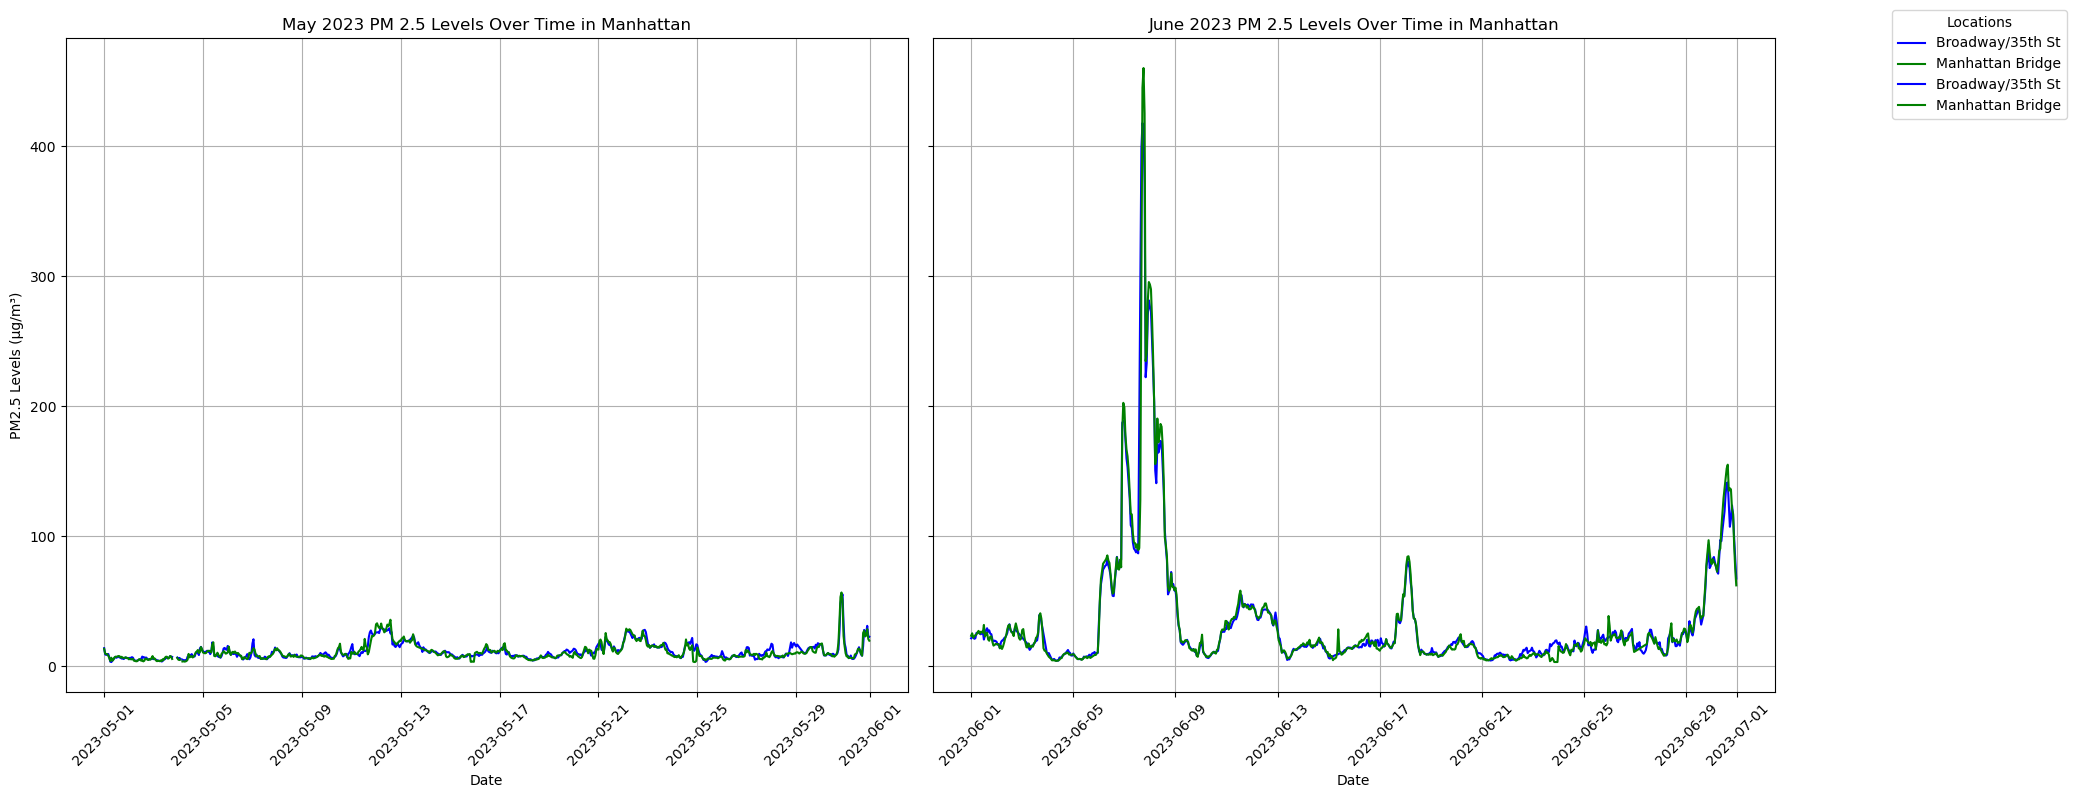

In [156]:
# Ensure ObservationTimeUTC is properly changed to datetime
data1merged_df['ObservationTimeUTC'] = pd.to_datetime(data1merged_df['ObservationTimeUTC'])
data2merged_df['ObservationTimeUTC'] = pd.to_datetime(data2merged_df['ObservationTimeUTC'])

# Filter data for Broadway/35th St and Manhattan Bridge for both May and June
data1broadway_data = data1merged_df[data1merged_df['SiteName'] == 'Broadway/35th St']
data1manhattan_data = data1merged_df[data1merged_df['SiteName'] == 'Manhattan Bridge']
data2broadway_data = data2merged_df[data2merged_df['SiteName'] == 'Broadway/35th St']
data2manhattan_data = data2merged_df[data2merged_df['SiteName'] == 'Manhattan Bridge']

# Average the PM 2.5 values for each date
may_broadway_avg = data1broadway_data.groupby('ObservationTimeUTC')['Value'].mean()
may_manhattan_avg = data1manhattan_data.groupby('ObservationTimeUTC')['Value'].mean()
june_broadway_avg = data2broadway_data.groupby('ObservationTimeUTC')['Value'].mean()
june_manhattan_avg = data2manhattan_data.groupby('ObservationTimeUTC')['Value'].mean()

# Create a figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharey=True)  # Two subplots side by side
axes[0].plot(may_broadway_avg.index, may_broadway_avg.values, label='Broadway/35th St', color='blue')
axes[0].plot(may_manhattan_avg.index, may_manhattan_avg.values, label='Manhattan Bridge', color='green')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('PM2.5 Levels (µg/m³)')
axes[0].set_title('May 2023 PM 2.5 Levels Over Time in Manhattan')
axes[0].grid()
axes[0].tick_params(axis='x', rotation=45)
axes[1].plot(june_broadway_avg.index, june_broadway_avg.values, label='Broadway/35th St', color='blue')
axes[1].plot(june_manhattan_avg.index, june_manhattan_avg.values, label='Manhattan Bridge', color='green')
axes[1].set_xlabel('Date')
axes[1].set_title('June 2023 PM 2.5 Levels Over Time in Manhattan')
axes[1].grid()
axes[1].tick_params(axis='x', rotation=45)
fig.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title="Locations")
plt.tight_layout()
plt.show()


PM 2.5 Levels Over Time for Broadway/35th St and Manhattan Bridge in May and June 2023, illustrating the impact of Canadian wildfires on air quality in New York City. The left graph shows relatively low stable PM 2.5 levels in May showcasing pre wildfire exposure levels. In contrast, the right graph highlights significant spikes in early June, likely associated with wildfire events. 

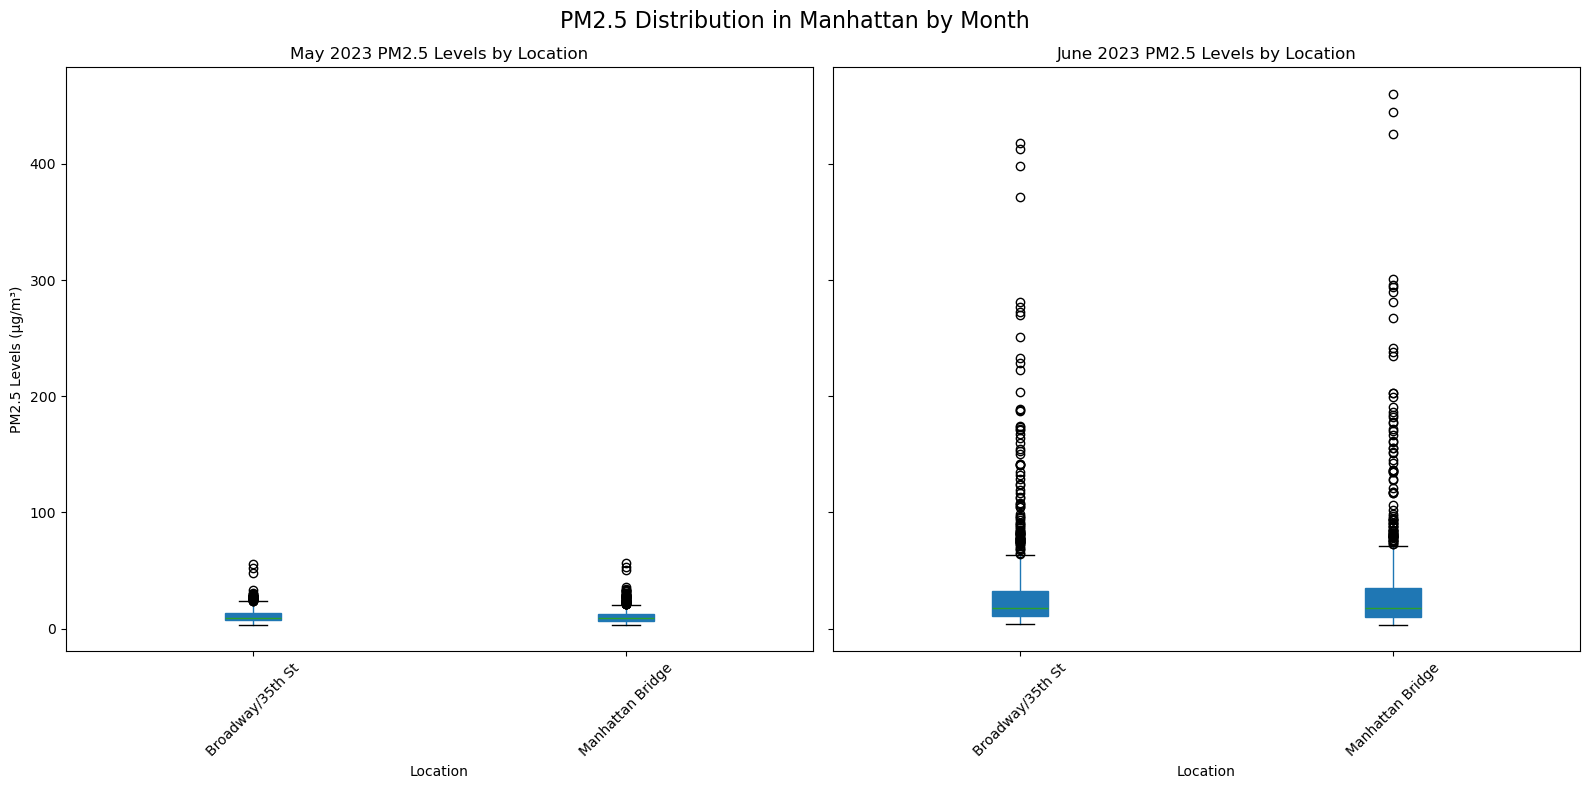

In [154]:
# Filter data for Broadway/35th St and Manhattan Bridge
data1broadway_data = data1merged_df[data1merged_df['SiteName'] == 'Broadway/35th St'].copy()
data1manhattan_data = data1merged_df[data1merged_df['SiteName'] == 'Manhattan Bridge'].copy()
data2broadway_data = data2merged_df[data2merged_df['SiteName'] == 'Broadway/35th St'].copy()
data2manhattan_data = data2merged_df[data2merged_df['SiteName'] == 'Manhattan Bridge'].copy()

# Add the 'Month' label
data1broadway_data['Month'] = 'May 2023'
data1manhattan_data['Month'] = 'May 2023'
data2broadway_data['Month'] = 'June 2023'
data2manhattan_data['Month'] = 'June 2023'

# Combine data for each month
may_data = pd.concat([data1broadway_data, data1manhattan_data], ignore_index=True)
june_data = pd.concat([data2broadway_data, data2manhattan_data], ignore_index=True)

# Create two separate box plots
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

# May 2023 Box Plot
may_data.boxplot(column='Value', by='SiteName', ax=axes[0], grid=False, patch_artist=True)
axes[0].set_title('May 2023 PM2.5 Levels by Location')
axes[0].set_xlabel('Location')
axes[0].set_ylabel('PM2.5 Levels (µg/m³)')
axes[0].tick_params(axis='x', rotation=45)

# June 2023 Box Plot
june_data.boxplot(column='Value', by='SiteName', ax=axes[1], grid=False, patch_artist=True)
axes[1].set_title('June 2023 PM2.5 Levels by Location')
axes[1].set_xlabel('Location')
axes[1].tick_params(axis='x', rotation=45)

# Overall adjustments
fig.suptitle('PM2.5 Distribution in Manhattan by Month', fontsize=16)
plt.tight_layout()

# Show the plots
plt.show()

Comparison of PM2.5 Distribution at Broadway/35th St and Manhattan Bridge for May and June 2023. The left plot shows relatively low PM2.5 values in May, with limited variability and fewer outliers, indicating better air quality during this month. The right plot highlights a significant increase in PM2.5 levels in June, with higher variability and numerous outliers, likely attributed to the impact of Canadian wildfires in New York City. The box plots reveal that PM2.5 levels in June have a much wider distribution with higher median values and more outliers compared to May.

In [111]:
# Load the CSV file for weather in May 2023
data1weather = 'May2023_Weather.csv'
data1weather_df = pd.read_csv(data1weather)
data1weather_df_head = data1weather_df.head()
print(data1weather_df_head)

# Load the CSV file for weather in June 2023
data2weather = 'June2023_Weather.csv'
data2weather_df = pd.read_csv(data2weather)
data2weather_df_head = data2weather_df.head()
print(data2weather_df_head)

         Date Maximum  Minimum Average Departure HDD CDD Precipitation  \
0  2023-05-01      61     49.0    55.0        42  10   0          0.09   
1  2023-05-02      56     44.0    50.0      -9.5  15   0          0.25   
2  2023-05-03      57     47.0    52.0       -77  13   0             T   
3  2023-05-04      55     48.0     515      -8.5  13   0          0.05   
4  2023-05-05      66     48.0    57.0      -3.3   8   0          0.00   

  New Snow Snow Depth  
0      0.0          0  
1      0.0          0  
2      0.0          0  
3      0.0          0  
4      0.0          0  
         Date Maximum  Minimum Average Departure HDD CDD Precipitation  \
0  2023-06-01      87     59.0    73.0        54   0   8          0.00   
1  2023-06-02      91     66.0    78.5      10.6   0  14          0.24   
2  2023-06-03      69     54.0     615      -6.7   3   0          0.00   
3  2023-06-04      69     49.0    59.0      -9.5   6   0          0.00   
4  2023-06-05      76     56.0    66.0   

In [131]:
# Load the data for May and June from NOAA Online Weather Data
data1weather = 'May2023_Weather.csv'
data2weather = 'June2023_Weather.csv'
data1weather_df = pd.read_csv(data1weather)
data2weather_df = pd.read_csv(data2weather)
# Remove non-date rows from the DataFrame
data1weather_df = data1weather_df[~data1weather_df['Date'].str.contains('Sum|Average|Normal', na=False)]
data2weather_df = data2weather_df[~data2weather_df['Date'].str.contains('Sum|Average|Normal', na=False)]
# Convert the 'Date' column to datetime
data1weather_df['Date'] = pd.to_datetime(data1weather_df['Date'], errors='coerce')
data2weather_df['Date'] = pd.to_datetime(data2weather_df['Date'], errors='coerce')

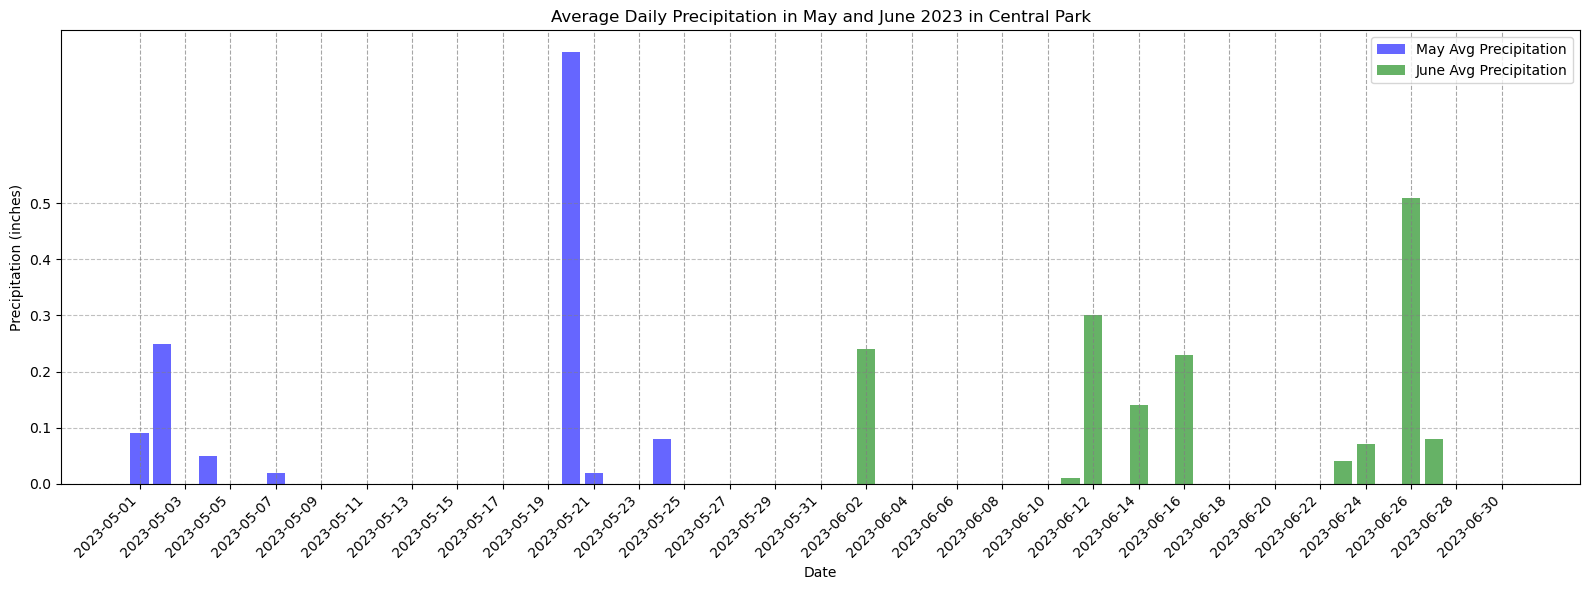

In [140]:
#Precipitation is numeric
data1weather_df['Precipitation'] = data1weather_df['Precipitation'].replace('T', 0).astype(float)
data2weather_df['Precipitation'] = data2weather_df['Precipitation'].replace('T', 0).astype(float)

# Graph: Average Daily Precipitation in May and June 2023
plt.figure(figsize=(16, 6))

# Create x positions for May and June
x_may = np.arange(len(data1weather_df['Date']))
x_june = np.arange(len(data2weather_df['Date'])) + len(data1weather_df['Date'])

# Plot 
plt.bar(x_may, data1weather_df['Precipitation'], label='May Avg Precipitation', color='blue', alpha=0.6, width=0.8)
plt.bar(x_june, data2weather_df['Precipitation'], label='June Avg Precipitation', color='green', alpha=0.6, width=0.8)
all_dates = list(data1weather_df['Date'].dt.strftime('%Y-%m-%d')) + list(data2weather_df['Date'].dt.strftime('%Y-%m-%d'))
selected_ticks = np.arange(0, len(all_dates), 2)  # Every other day
selected_labels = [all_dates[i] for i in selected_ticks]  # Corresponding labels
plt.xticks(ticks=selected_ticks, labels=selected_labels, rotation=45, ha='right')
plt.yticks(np.arange(0, 0.6, 0.1))  # Set ticks from 0 to 0.5 in 0.1 increments
plt.grid(axis='both', linestyle='--', alpha=0.7, color='gray')  # Add gridlines for both x and y axes
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.title('Average Daily Precipitation in May and June 2023 in Central Park')
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

Daily average precipitation levels in New York City during May and June 2023. May exhibits sparse rainfall with isolated spikes, particularly on May 21, while June shows more variability and higher precipitation levels, with notable peaks on June 14 and June 26. Blank bars represent days with no measurable precipitation, emphasizing the frequent dry days in May and the intermittent dry spells in June. This highlights the contrasting rainfall patterns between the two months.

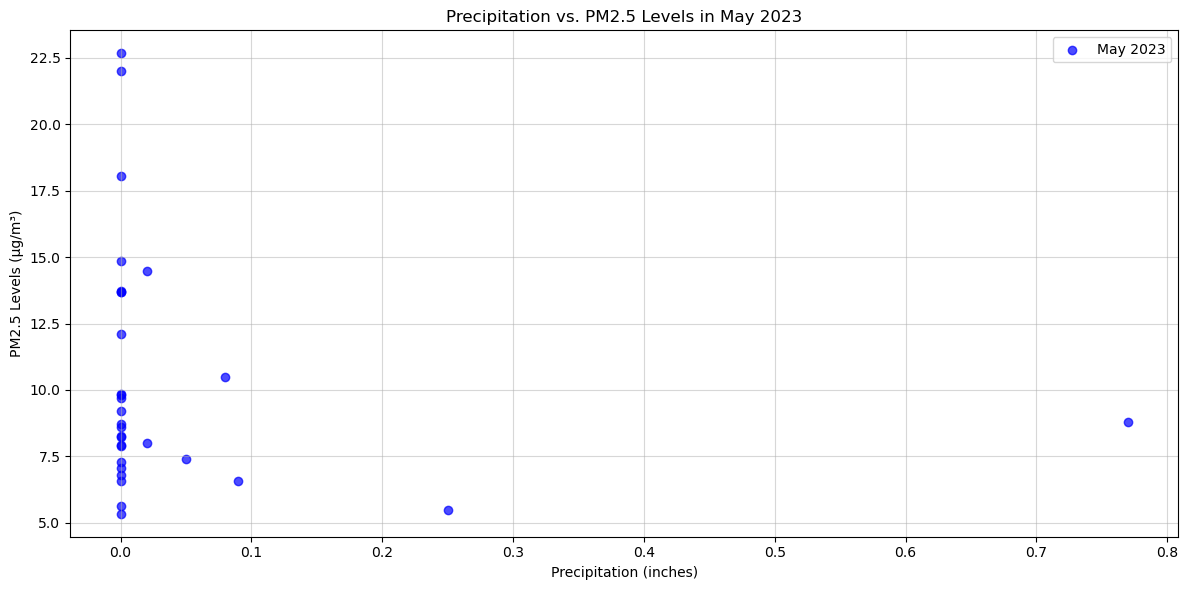

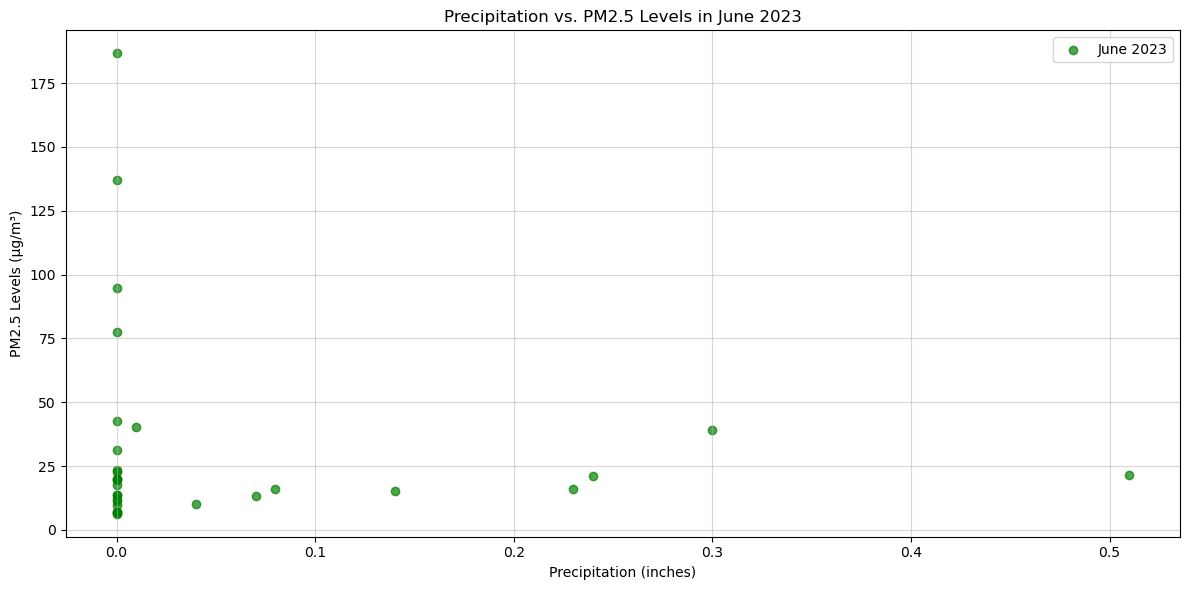

In [157]:
# Ensure the 'Date' columns in both dataframes are in datetime format
data1weather_df['Date'] = pd.to_datetime(data1weather_df['Date'], errors='coerce')
daily_pm25_avg_may['Date'] = pd.to_datetime(daily_pm25_avg_may['Date'], errors='coerce')

# Merge PM2.5 and weather data for May
merged_data_may = pd.merge(
    daily_pm25_avg_may,
    data1weather_df[['Date', 'Precipitation']],
    on='Date',
    how='inner'
)
merged_data_may.rename(
    columns={'Value': 'PM2.5 (µg/m³)', 'Precipitation': 'Precipitation (inches)'},
    inplace=True
)

data2weather_df['Date'] = pd.to_datetime(data2weather_df['Date'], errors='coerce')
daily_pm25_avg_june['Date'] = pd.to_datetime(daily_pm25_avg_june['Date'], errors='coerce')

# Merge PM2.5 and weather data for June
merged_data_june = pd.merge(
    daily_pm25_avg_june,
    data2weather_df[['Date', 'Precipitation']],
    on='Date',
    how='inner'
)
merged_data_june.rename(
    columns={'Value': 'PM2.5 (µg/m³)', 'Precipitation': 'Precipitation (inches)'},
    inplace=True
)

# Scatter plot for May 2023
plt.figure(figsize=(12, 6))
plt.scatter(merged_data_may['Precipitation (inches)'], merged_data_may['PM2.5 (µg/m³)'], color='blue', alpha=0.7, label='May 2023')
plt.xlabel('Precipitation (inches)')
plt.ylabel('PM2.5 Levels (µg/m³)')
plt.title('Precipitation vs. PM2.5 Levels in May 2023')
plt.grid(alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# Scatter plot for June 2023
plt.figure(figsize=(12, 6))
plt.scatter(merged_data_june['Precipitation (inches)'], merged_data_june['PM2.5 (µg/m³)'], color='green', alpha=0.7, label='June 2023')
plt.xlabel('Precipitation (inches)')
plt.ylabel('PM2.5 Levels (µg/m³)')
plt.title('Precipitation vs. PM2.5 Levels in June 2023')
plt.grid(alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


Scatter plots showing the relationship between precipitation and PM2.5 levels in New York City during May and June 2023.

Top Plot (May 2023): Low precipitation levels are observed for most days, with PM2.5 levels remaining under 15 µg/m³. Notable outliers with higher precipitation coincide with lower PM2.5 levels, suggesting a potential negative relationship between rainfall and air pollution levels.

Bottom Plot (June 2023): Increased variability in PM2.5 levels, with some extreme values exceeding 175 µg/m³. Days with minimal or no precipitation generally show higher PM2.5 concentrations, consistent with the hypothesis that reduced precipitation during this period is associated with elevated PM2.5 levels, likely due to wildfire smoke influence.

Conclusion: The analysis reveals a potential inverse relationship between precipitation and PM2.5 levels in May and June 2023 in New York City. May exhibited low PM2.5 levels with occasional rainfall, while June saw significantly elevated PM2.5 levels, particularly on days with little or no precipitation. These findings support the hypothesis that reduced precipitation may exacerbate air pollution levels during wildfire events.


Future steps: expanding the analysis to additional months and years to validate the observed trends, incorporating meteorological variables like wind and humidity, and conducting spatial analysis across other regions. Advanced statistical modeling can help quantify the relationship between precipitation and PM2.5 levels. Additionally, exploring public health impacts will provide a deeper understanding of the real-world implications of elevated air pollution.